In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
from dsp.pll import PLL, PLL_2, PLL_3
from dsp.fir import WSFilter
from dsp.fm import FMDemodulator
from dsp.am import AMDemodulator
from exp_utils import read_iq, read_real, welch

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
from os.path import join
root_path = os.getenv('RADIO_PATH', '.')

In [5]:
data_path = join(root_path, './data/iq_music')
iq_samples = read_iq(data_path, np.int16)

### IQ samples spectral density

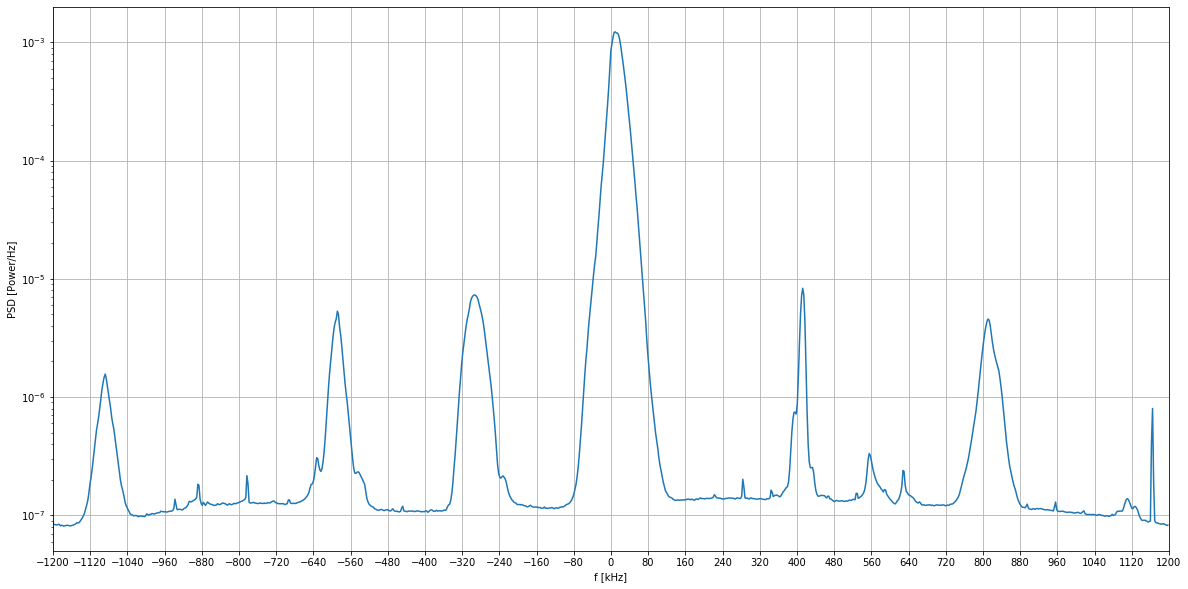

In [6]:
sample_rate = 2400000
welch(iq_samples, sample_rate)

### Now let's compare the effects of offline and online filtering (windowed-sinc).

In [7]:
sample_rate_fm = 240000
M = sample_rate // sample_rate_fm
ws_filter = WSFilter(512, M, 1 / (2 * 1.2 * M))

In [8]:
iq_filtered = ws_filter.complex_run(iq_samples)

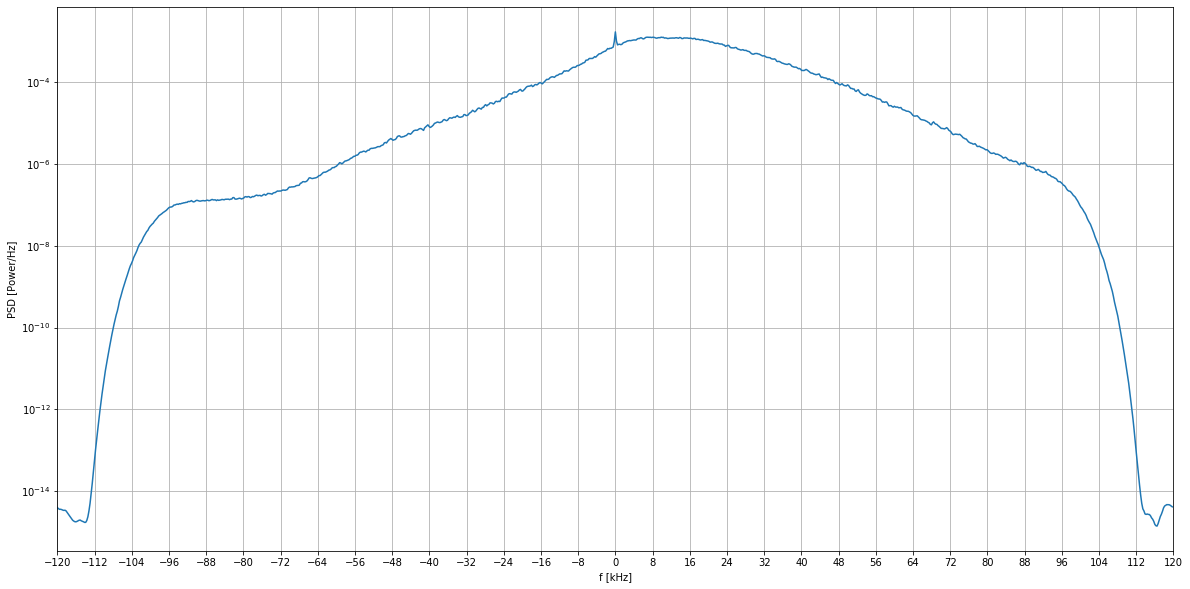

In [9]:
welch(iq_filtered, sample_rate_fm)

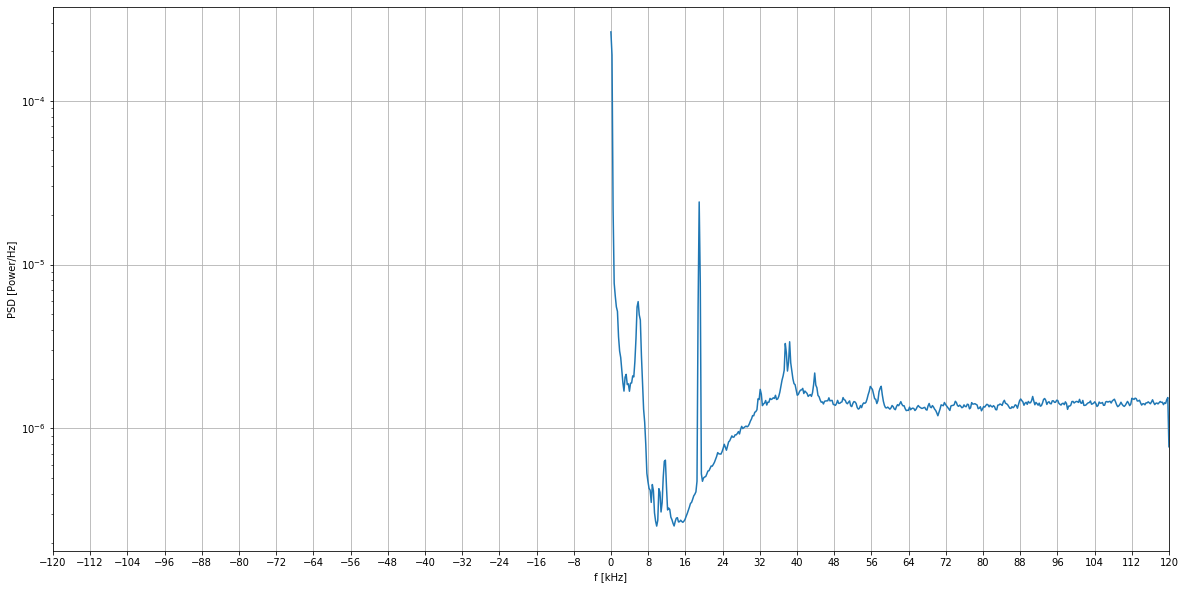

In [10]:
fm_demod = FMDemodulator()
iq_demodulated = fm_demod.run(iq_filtered)
welch(iq_demodulated, sample_rate_fm)

In [12]:
audio_rate = 48000
M = sample_rate_fm // audio_rate
ws_filter2 = WSFilter(512, M, 1 / (2 * 1.2 * M))
audio = ws_filter2.real_run(iq_demodulated)

audio_path = join(root_path, 'audio/music_python.wav')
wavfile.write(audio_path, rate=audio_rate, data=audio)

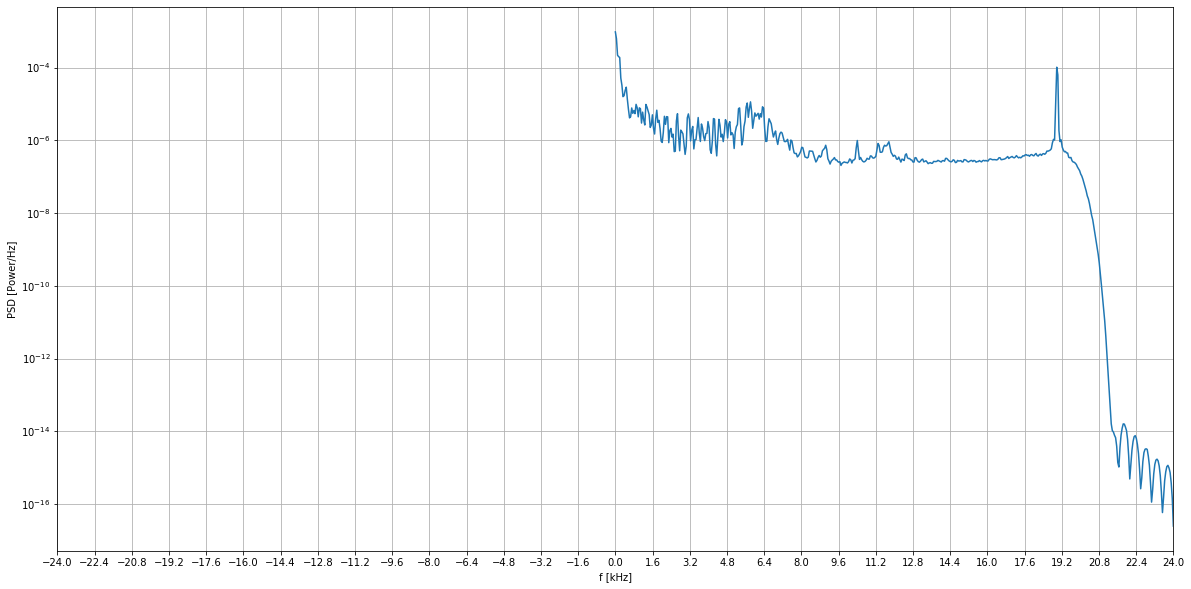

In [13]:
welch(audio, audio_rate)